#**Customer Segmentation with RFM Analysis: E-Commerce Dataset**

###Background

A marketing manager believes that the company must treat the customer differently in order to gain maximum profit. So, he wants to implement target marketing. Target marketing is a marketing strategy that breaks a market into segments and then concentrates your marketing efforts on one or a few key segments consisting of the customers whose needs and desires most closely match your product or service offerings. To implement target marketing, he asks for help from a data analyst to do customer segmentation. There are many method to do customer segmentation. But as data analyst, we will use RFM method because this method is the one of the most popular method in customer segmentation.

###Objective

1. Determining Customer Segmentation based on the value of the customer
2. Determining Customer Segmentation in order to doing Targetted Marketing

##Dataset

You can download dataset from https://www.kaggle.com/datasets/carrie1/ecommerce-data

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

#**1. Import Library and Dataset**

In [ ]:
#Import the library needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time, warnings
import datetime as dt
warnings.filterwarnings("ignore")

In [ ]:
#Get and Read the dataset
df=pd.read_csv("data.csv", encoding= 'unicode_escape', on_bad_lines='skip')

In [ ]:
#Check the dataset
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


#**2. Data Cleaning**

## 2.1 Erase unused value

In [ ]:
#Check the data type and null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
#drop variable that is not used for further analysis
df = df.drop(columns=['StockCode', 'Description', 'Country'])

In [ ]:
#Check the null data
df1 = df[df.isna().any(axis=1)]
df1

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
622,536414,56,12/1/2010 11:52,0.00,NaN
1443,536544,1,12/1/2010 14:32,2.51,NaN
1444,536544,2,12/1/2010 14:32,2.51,NaN
1445,536544,4,12/1/2010 14:32,0.85,NaN
1446,536544,2,12/1/2010 14:32,1.66,NaN
...,...,...,...,...,...
541536,581498,5,12/9/2011 10:26,4.13,NaN
541537,581498,4,12/9/2011 10:26,4.13,NaN
541538,581498,1,12/9/2011 10:26,4.96,NaN
541539,581498,1,12/9/2011 10:26,10.79,NaN


In [ ]:
#Erase dataset when ID is null
df = df.dropna(how='any',axis=0)

##2.2 Repair the date

In [ ]:
#Add date collumn
df['date'] = pd.to_datetime(df['InvoiceDate'])
df['date'] = df['date'].dt.date

##2.3 Outlier Handling

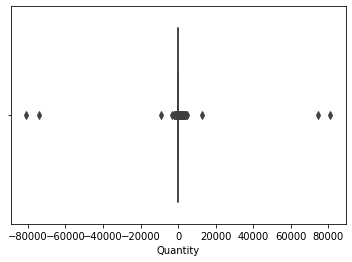

In [ ]:
#Check the outlier of Quantity variable using boxplot.
sns.boxplot(x=df["Quantity"]);

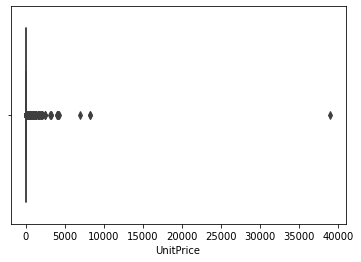

In [ ]:
#Check the outlier of UnitPrice variable using boxplot.
sns.boxplot(x=df["UnitPrice"]);

In [ ]:
#There are illogical values in Quantity and UnitPrice variable. But, because the outlier is not sensitive in RFM analysis, I only focus handling outlier for negative value only. I will convert negative value to median.
quantity_median = df['Quantity'].median()
df.loc[df.Quantity < 0] = np.nan
df['Quantity'].fillna(quantity_median,inplace=True)

## 2.4 Adding Recency, Frequency, and Monetary (RFM) variable

###2.4.1 Searching Recency

In [ ]:
recency_df = df.groupby(by='CustomerID', as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']

In [ ]:
recency_df

,CustomerID,LastPurshaceDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4334,18280.0,2011-03-07
4335,18281.0,2011-06-12
4336,18282.0,2011-12-02
4337,18283.0,2011-12-06


In [ ]:
recent_date=recency_df.LastPurshaceDate.max()
recent_date

datetime.date(2011, 12, 9)

In [ ]:
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (recent_date - x).days)
recency_df.head()

,CustomerID,LastPurshaceDate,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


###2.4.2 Searching Frequency

In [ ]:
df1 = df

In [ ]:
frequency_df = df1.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']

In [ ]:
frequency_df

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


###2.4.3 Searching Monetary

In [ ]:
# Create column total cost
df['TotalCost'] = df['Quantity'] * df['UnitPrice']

In [ ]:
monetary_df = df.groupby(by='CustomerID',as_index=False).agg({'TotalCost': 'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
# ## Create RFM Table
# Merge recency dataframe with frequency dataframe
temp_df = recency_df.merge(frequency_df,on='CustomerID')
temp_df.head()
# Merge with monetary dataframe to get a table with the 3 columns
rfm_df = temp_df.merge(monetary_df,on='CustomerID')

In [ ]:
rfm_df

,CustomerID,LastPurshaceDate,Recency,Frequency,Monetary
0,12346.0,2011-01-18,325,1,77183.60
1,12347.0,2011-12-07,2,182,4310.00
2,12348.0,2011-09-25,75,31,1797.24
3,12349.0,2011-11-21,18,73,1757.55
4,12350.0,2011-02-02,310,17,334.40
...,...,...,...,...,...
4334,18280.0,2011-03-07,277,10,180.60
4335,18281.0,2011-06-12,180,7,80.82
4336,18282.0,2011-12-02,7,12,178.05
4337,18283.0,2011-12-06,3,756,2094.88


#**3. Exploratory Data Analysis (EDA)**

In [ ]:
#This is the descriptive statistics from the numeric variable
rfm_df.describe()

,CustomerID,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,92.041484,91.708689,2053.793018
std,1721.889758,100.007757,228.792852,8988.248381
min,12346.000000,0.000000,1.000000,0.000000
25%,13812.500000,17.000000,17.000000,307.245000
50%,15299.000000,50.000000,41.000000,674.450000
75%,16778.500000,141.500000,100.000000,1661.640000
max,18287.000000,373.000000,7847.000000,280206.020000


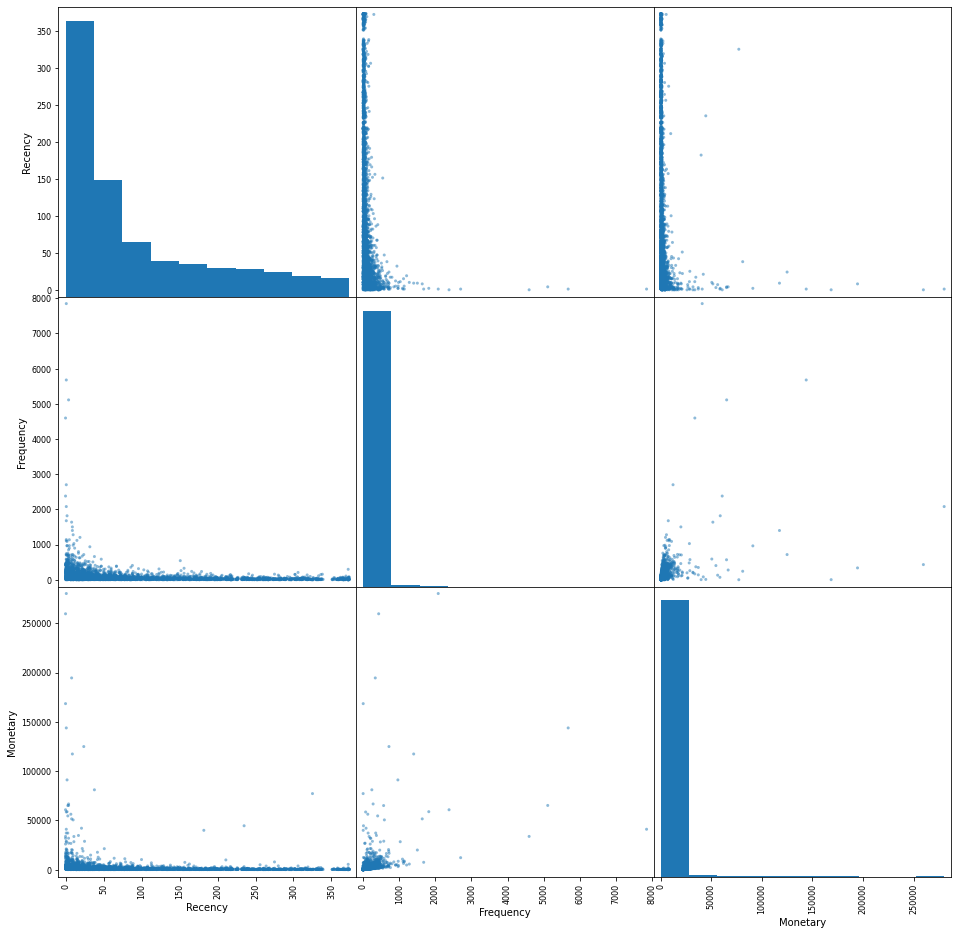

In [ ]:
#Look the scatter plot of RFM
rfm_scatter = rfm_df[['Recency','Frequency', 'Monetary']]
pd.plotting.scatter_matrix(rfm_scatter,figsize=(16, 16));

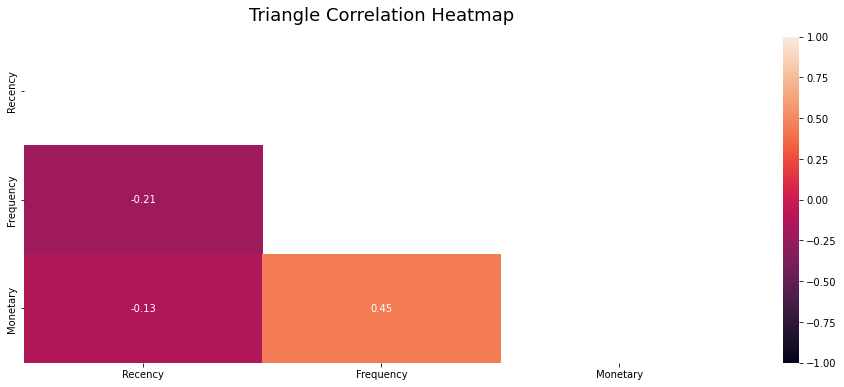

In [ ]:
#See the correlation of RFM
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(rfm_scatter.corr(), dtype=np.bool))
heatmap = sns.heatmap(rfm_scatter.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

#**4. RFM Analysis**

##4.1 Customer Segmentation to See Customer Value

In [ ]:
# Rank each metric R , F & M
rfm_df['R_rank'] = rfm_df['Recency'].rank( ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
rfm_df.head()

,CustomerID,LastPurshaceDate,Recency,Frequency,Monetary,R_rank,F_rank,M_rank
0,12346.0,2011-01-18,325,1,77183.60,162.5,36.5,4330.0
1,12347.0,2011-12-07,2,182,4310.00,4156.5,3823.0,4004.0
2,12348.0,2011-09-25,75,31,1797.24,1646.0,1827.5,3334.0
3,12349.0,2011-11-21,18,73,1757.55,3209.5,2888.5,3306.0
4,12350.0,2011-02-02,310,17,334.40,227.5,1081.5,1230.0


In [ ]:
# normalize each rank with Max rank
rfm_df['R_rank_norm']=(rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm']=(rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm']=(rfm_df['F_rank']/rfm_df['M_rank'].max())*100
rfm_df.head()

,CustomerID,LastPurshaceDate,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm
0,12346.0,2011-01-18,325,1,77183.60,162.5,36.5,4330.0,3.759833,0.841208,0.841208
1,12347.0,2011-12-07,2,182,4310.00,4156.5,3823.0,4004.0,96.170754,88.107859,88.107859
2,12348.0,2011-09-25,75,31,1797.24,1646.0,1827.5,3334.0,38.084220,42.118000,42.118000
3,12349.0,2011-11-21,18,73,1757.55,3209.5,2888.5,3306.0,74.259602,66.570638,66.570638
4,12350.0,2011-02-02,310,17,334.40,227.5,1081.5,1230.0,5.263767,24.925098,24.925098


In [ ]:
# Now apply our equation and create final score **Consolidated Score = 0.15*R_rank_norm + 0.28*F_rank_norm + 0.57M_rank_norm**
rfm_df['RFM_Score']=0.15*rfm_df['R_rank_norm']+0.28*rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df=rfm_df.round(0)
rfm_df.head()

,CustomerID,LastPurshaceDate,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
0,12346.0,2011-01-18,325,1,77184.0,162.0,36.0,4330.0,4.0,1.0,1.0,1.0
1,12347.0,2011-12-07,2,182,4310.0,4156.0,3823.0,4004.0,96.0,88.0,88.0,89.0
2,12348.0,2011-09-25,75,31,1797.0,1646.0,1828.0,3334.0,38.0,42.0,42.0,42.0
3,12349.0,2011-11-21,18,73,1758.0,3210.0,2888.0,3306.0,74.0,67.0,67.0,68.0
4,12350.0,2011-02-02,310,17,334.0,228.0,1082.0,1230.0,5.0,25.0,25.0,22.0


In [ ]:
# ## Customer segments with RFM Model
# # Segment customers based on RFM score
# 0 - 20 - Very low valued customer
# 20 - 40 - Low valued customer
# 40 - 60 - Medium valued customer
# 60 - 80 - High valued customer
# 80 - 100 - Very high valued customer
rfm_df['clv_segmentation'] = 0
rfm_df['clv_segmentation'][rfm_df['RFM_Score']>80] = 'Very High Valued Customer'
rfm_df['clv_segmentation'][(rfm_df['RFM_Score']>60) & (rfm_df['RFM_Score']<= 80)]  = 'High Valued Customer'
rfm_df['clv_segmentation'][(rfm_df['RFM_Score']>40) & (rfm_df['RFM_Score']<= 60)] = 'Medium Valued Customer'
rfm_df['clv_segmentation'][(rfm_df['RFM_Score']>20) & (rfm_df['RFM_Score']<= 40)] = 'Low Valued Customer'
rfm_df['clv_segmentation'][(rfm_df['RFM_Score']>0) & (rfm_df['RFM_Score']<= 20)] = 'Very Low Valued Customer'

In [ ]:
rfm_df

,CustomerID,LastPurshaceDate,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,clv_segmentation
0,12346.0,2011-01-18,325,1,77184.0,162.0,36.0,4330.0,4.0,1.0,1.0,1.0,Very Low Valued Customer
1,12347.0,2011-12-07,2,182,4310.0,4156.0,3823.0,4004.0,96.0,88.0,88.0,89.0,Very High Valued Customer
2,12348.0,2011-09-25,75,31,1797.0,1646.0,1828.0,3334.0,38.0,42.0,42.0,42.0,Medium Valued Customer
3,12349.0,2011-11-21,18,73,1758.0,3210.0,2888.0,3306.0,74.0,67.0,67.0,68.0,High Valued Customer
4,12350.0,2011-02-02,310,17,334.0,228.0,1082.0,1230.0,5.0,25.0,25.0,22.0,Low Valued Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,2011-03-07,277,10,181.0,355.0,622.0,564.0,8.0,14.0,14.0,13.0,Very Low Valued Customer
4335,18281.0,2011-06-12,180,7,81.0,860.0,407.0,105.0,20.0,9.0,9.0,11.0,Very Low Valued Customer
4336,18282.0,2011-12-02,7,12,178.0,3840.0,769.0,547.0,89.0,18.0,18.0,28.0,Low Valued Customer
4337,18283.0,2011-12-06,3,756,2095.0,4064.0,4310.0,3489.0,94.0,99.0,99.0,99.0,Very High Valued Customer


In [ ]:
rfm_df['clv_segmentation'].value_counts()

Low Valued Customer          972
Medium Valued Customer       926
High Valued Customer         922
Very Low Valued Customer     776
Very High Valued Customer    743
Name: clv_segmentation, dtype: int64

##4.2 Customer Segmentation for Target Marketing

In [ ]:
!pip install pandasql
!pip install type_enforced

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=458963b57f162bec6d4eb9a49bcc1e92d9314d7d0f8c1c7fdc710810c083447d
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for type-enforced: filename=type_enforced-0.0.7-py3-none-any.whl size=5306 sha256=7b83f70ea14e5d4313cdb285c1f154088374203d88d5efd1bcd19156f12b55f1
  Stored in directory: /root/.cache/pip/wheels/03/11/c1/111bc35f84f58605e3268b06128731394d2fde22a62c354bf6
Successfully built type-enforced


In [ ]:
!gdown https://drive.google.com/uc?id=1tg2b5IJnTMwkGEAdRgJJsg4M0ir-KOnr

Downloading...
From: https://drive.google.com/uc?id=1tg2b5IJnTMwkGEAdRgJJsg4M0ir-KOnr
To: /content/librfm.py
100% 9.26k/9.26k [00:00<00:00, 15.3MB/s]


In [ ]:
from librfm import RFM

In [ ]:
#divide each RFM feature into 5 buckets
rfm = RFM(
    id_colname ='CustomerID',
    recency_colname = 'Recency', 
    frequency_colname = 'Frequency', 
    monetary_colname = 'Monetary',
    num_cluster=5
);
rfm.fit(rfm_df);

In [ ]:
rfm.df_recency_model

,label,score,min,max
0,recency,1,180,373
1,recency,2,72,179
2,recency,3,33,71
3,recency,4,14,32
4,recency,5,0,12


In [ ]:
rfm.df_frequency_model

,label,score,min,max
0,frequency,1,1,14
1,frequency,2,15,29
2,frequency,3,30,58
3,frequency,4,59,121
4,frequency,5,122,7847


In [ ]:
rfm.df_monetary_model

,label,score,min,max
0,monetary,1,0.0,250.0
1,monetary,2,251.0,490.0
2,monetary,3,491.0,941.0
3,monetary,4,942.0,2057.0
4,monetary,5,2059.0,280206.0


In [ ]:
rfm.score(rfm_df)

,id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
0,12346.0,325,1,77184.0,1,1,5,115
1,12347.0,2,182,4310.0,5,5,5,555
2,12348.0,75,31,1797.0,2,3,4,234
3,12349.0,18,73,1758.0,4,4,4,444
4,12350.0,310,17,334.0,1,2,2,122
...,...,...,...,...,...,...,...,...
4334,18280.0,277,10,181.0,1,1,1,111
4335,18281.0,180,7,81.0,1,1,1,111
4336,18282.0,7,12,178.0,5,1,1,511
4337,18283.0,3,756,2095.0,5,5,5,555


In [ ]:
#The dataset contains the result
rfm_result= rfm.transform(rfm_df)
rfm_result

,id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,Segment,Activity,Actionable
0,12346.0,325,1,77184.0,1,1,5,115,Can’t Lose Them,"Made biggest purchases, and often. But haven’t...","Win them back via renewals or newer products, ..."
1,12347.0,2,182,4310.0,5,5,5,555,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
2,12348.0,75,31,1797.0,2,3,4,234,At Risk,Spent big money and purchased often. But long ...,"Send personalized emails to reconnect, offer r..."
3,12349.0,18,73,1758.0,4,4,4,444,Loyal Customers,Spend good money with us often. Responsive to ...,Upsell higher value products. Ask for reviews....
4,12350.0,310,17,334.0,1,2,2,122,Hibernating,"Last purchase was long back, low spenders and ...",Offer other relevant products and special disc...
...,...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,277,10,181.0,1,1,1,111,Lost,"Lowest recency, frequency and monetary scores.","Revive interest with reach out campaign, ignor..."
4335,18281.0,180,7,81.0,1,1,1,111,Lost,"Lowest recency, frequency and monetary scores.","Revive interest with reach out campaign, ignor..."
4336,18282.0,7,12,178.0,5,1,1,511,Recent Customers,"Bought most recently, but not often.","Provide on-boarding support, give them early s..."
4337,18283.0,3,756,2095.0,5,5,5,555,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...


In [ ]:
#Check the total customer each segment
rfm_result['Segment'].value_counts()

Hibernating                    823
Champions                      799
Potential Loyalist             511
Lost                           433
At Risk                        428
Loyal Customers                417
Recent Customers               310
Customers Needing Attention    228
About To Sleep                 167
Promising                      134
Can’t Lose Them                 89
Name: Segment, dtype: int64

#**5. Business Recommendation**

**1. We divide customer according their value:**

      a. Very High Valued Customer
      b. High Valued Customer
      c. Medium Valued Customer
      d. Low Valued Customer
      e. Very Low Valued Customer
      
      Stakeholder must appreciate more for very high or high valued customer because this customer is potential for future revenue

**2.   We also segmenting customer according the marketing strategy:**

    a. Champions: Bought recently, buy often and spend the most
    b. Loyal customers: Buy on a regular basis. Responsive to promotions.
    c. Potential loyalist: Recent customers with average frequency.
    d. Recent customers: Bought most recently, but not often.
    e. Promising: Recent shoppers, but haven’t spent much.
    f. Customer Needs attention: Above average recency, frequency and monetary values, May not have bought very recently though.
    g. About to sleep: Below average recency and frequency. Will lose them if not reactivated.
    h. At risk: Some time since they’ve purchased. Need to bring them back!
    i. Can’t lose them: Used to purchase frequently but haven’t returned for a long time.
    j. Hibernating: Last purchase was long back and low number of orders. May be lost.
    k. Lost: Lowest recency, frequency and monetary scores.
    

**3. For each of the segments, you could design appropriate actions, for example:**

    a. Champions: Reward them. They can become evangelists and early adopters of new products.
    b. Loyal customers: Up-sell higher value products. Engage them. Ask for reviews.
    c. Potential loyalist: Recommend other products. Engage in loyalty programs.
    d. Recent/new customers: Provide a good onboarding process. Start building the relationship.
    e. Promising: Create more brand awareness. Provide free trials.
    f. Customer Needs attention: Reactivate them. Provide limited time offers. Recommend new products based on purchase history.
    g. About to sleep: Reactivate them. Share valuable resources. Recommend popular products. Offer discounts.
    h. At risk: Send personalised email or other messages to reconnect. Provide good offers and share valuable resources.
    i. Can’t lose them: Win them back. Talk to them. Make them special offers. Make them feel valuable.
    j. Hibernating: Recreate brand value. Offer relevant products and good offers
    k. Lost: Revive interest with reach out campaign, ignore otherwise.

